# Mutual transform between 2D and 3D

Pre-require the `*.calibpkl` from [`2A single ball`] / [`2B triple ball`] /[`3 world axes register`]

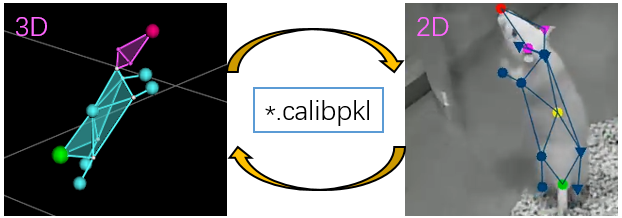

## Define the `CalibPredict` model
- **p3d**: (NSAMPLE, 3)
- **p2d**: (NVIEW, NSAMPLE, 2), np.nan means missing data.

```python
calibPredict = CalibPredict(calibfile)
p2d = calibPredict.p3d_to_p2d(p3d)
p3d = calibPredict.p2d_to_p3d(p2d)
```

In [1]:
from multiview_calib.calibpkl_predict import CalibPredict
import numpy as np

np.random.seed(0)
calibfile = 'multiview_no_world_axes.calibpkl'
calib = CalibPredict(calibfile)
nsample = 1000
test_p3d = np.random.rand(nsample, 3)



## 3D -> 2D

In [2]:

p2d = calib.p3d_to_p2d(test_p3d)
print(p2d.shape)  #(NVIEW, NSAMPLE, 2)

(9, 1000, 2)


## 2D -> 3D

In [3]:
p3d = calib.p2d_to_p3d(p2d)
print(p3d.shape)  #(NSAMPLE, 3)
print('differenct', np.mean(np.linalg.norm(test_p3d - p3d, axis=-1)))


(1000, 3)
differenct 1.037356733980246e-05


## 2D (with nan) -> 3D
Multiview model is redundancy to construct 3D when some view is missing in sometimes.

In [4]:
p2d[0,...] = np.nan # set one view to nan as missing data
rep3d = calib.p2d_to_p3d(p2d)
print('differenct', np.mean(np.linalg.norm(rep3d - p3d, axis=-1)))

differenct 3.540110756503614e-06
